In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
dataset_path_x='/content/drive/MyDrive/ML_Experiments/X.npy'
dataset_path_y='/content/drive/MyDrive/ML_Experiments/Y.npy'

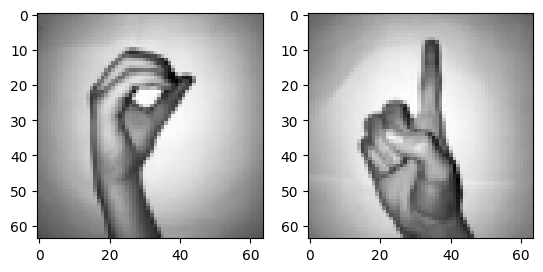

In [4]:
import numpy as np
x=np.load(dataset_path_x)
img_size=64
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(x[399].reshape(img_size,img_size),cmap='gray')
plt.subplot(1,2,2)
plt.imshow(x[900].reshape(img_size,img_size),cmap='gray')

In [5]:
x.shape #64x64 is the size of pixel and 2062 is no of col

(2062, 64, 64)

In [6]:
X_new=np.concatenate((x[204:409],x[822:1027]),axis=0)
z=np.zeros(205)
o=np.ones(205)
Y_new=np.concatenate((z,o),axis=0).reshape(X_new.shape[0],1)
print("xshape",X_new.shape)
print("yshape",Y_new.shape)

xshape (410, 64, 64)
yshape (410, 1)


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_new,Y_new,test_size=0.15,random_state=42)
number_of_train=x_train.shape[0] # Changed X_new_train to x_train
number_of_test=x_test.shape[0]  # Changed X_new_test to x_test
print("Number of training examples: ",number_of_train)
print("Number of testing examples: ",number_of_test)

Number of training examples:  348
Number of testing examples:  62


In [8]:
X_train_flatten=x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])#multiplication is making it into 2d image
X_test_flatten=x_test.reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten: ",X_train_flatten.shape)
print("X test flatten: ",X_test_flatten.shape)
#means we have 348 images and each image has 4096 pixels-in train array
#62 images and again each with 4096 pixels- in test array

X train flatten:  (348, 4096)
X test flatten:  (62, 4096)


In [9]:
x_train=X_train_flatten.T
x_test=X_test_flatten.T
y_train=y_train.T
y_test=y_test.T
print("X train: ",x_train.shape)
print("X test: ",x_test.shape)
print("Y train: ",y_train.shape)
print("Y test: ",y_test.shape)

X train:  (4096, 348)
X test:  (4096, 62)
Y train:  (1, 348)
Y test:  (1, 62)


In [10]:
def initialize_parameters_and_layer_sizes_NN(x_train,y_train):
  parameters={"weight1": np.random.randn(3,x_train.shape[0])*0.1,
              "bias1":np.zeros((3,1)),
              "weight2": np.random.randn(y_train.shape[0],3)*0.1,
              "bias2":np.zeros((y_train.shape[0],1))}
  return parameters


In [11]:
def forward_propagation_NN(x_train,parameters):
  Z1=np.dot(parameters["weight1"],x_train)+parameters["bias1"]
  A1=np.tanh(Z1)
  Z2=np.dot(parameters["weight2"],A1)+parameters["bias2"]
  A2=sigmoid(Z2)
  cache={
      "Z1":Z1,
      "A1":A1,
      "Z2":Z2,
      "A2":A2
  }
  return A2,cache

In [12]:
def sigmoid(z):
  y_head=1/(1+np.exp(-z))
  return y_head

In [13]:
def compute_cost_NN(A2,Y,parameters): #here A2 is predicted output and Y is org output
  logprobs=np.multiply(np.log(A2),Y)
  cost=-np.sum(logprobs)/Y.shape[1]
  return cost

In [14]:
def backward_propagation_NN(parameters,cache,X,Y):
  dZ2=cache["A2"]-Y
  dW2=np.dot(dZ2,cache["A1"].T)/X.shape[1]
  db2=np.sum(dZ2,axis=1,keepdims=True)/X.shape[1]
  dZ1=np.dot(parameters["weight2"].T,dZ2)*(1-np.power(cache["A1"],2))
  dW1=np.dot(dZ1,X.T)/X.shape[1]
  db1=np.sum(dZ1,axis=1,keepdims=True)/X.shape[1]
  grads={"dweight1":dW1,"dbias1":db1,"dweight2":dW2,"dbias2":db2}
  return grads

In [15]:
def update_parameters(parameters, grads, learning_rate=0.01):
    parameters["weight1"] -= learning_rate * grads["dWwight1"]
    parameters["bias1"] -= learning_rate * grads["dbias1"]
    parameters["weight2"] -= learning_rate * grads["dWeight2"]
    parameters["bias2"] -= learning_rate * grads["dbias2"]
    return parameters


In [16]:
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}

    return parameters

In [17]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction


Cost after iteration 0: 0.301109
Cost after iteration 100: 0.324407
Cost after iteration 200: 0.297976
Cost after iteration 300: 0.258372
Cost after iteration 400: 0.209251
Cost after iteration 500: 0.167043
Cost after iteration 600: 0.136061
Cost after iteration 700: 0.113817
Cost after iteration 800: 0.097510
Cost after iteration 900: 0.085266
Cost after iteration 1000: 0.075836
Cost after iteration 1100: 0.068390
Cost after iteration 1200: 0.062370
Cost after iteration 1300: 0.057390
Cost after iteration 1400: 0.053175
Cost after iteration 1500: 0.049508
Cost after iteration 1600: 0.046198
Cost after iteration 1700: 0.043056
Cost after iteration 1800: 0.039899
Cost after iteration 1900: 0.036626
Cost after iteration 2000: 0.033353
Cost after iteration 2100: 0.030243
Cost after iteration 2200: 0.027261
Cost after iteration 2300: 0.024584
Cost after iteration 2400: 0.022461


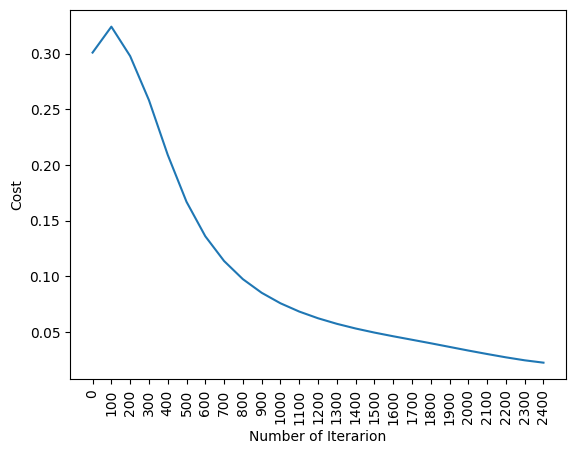

train accuracy: 99.42528735632185 %
test accuracy: 95.16129032258064 %


In [18]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)

        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()

    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)